🌱 Global random seed set to 42
Epoch 1/500


/g/g90/dhakal1/All/dev/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-07 14:32:48.576203: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be igno

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.9386 - mape: 177.1827 - val_loss: 0.4539 - val_mape: 189.4171 - learning_rate: 0.0010
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7585 - mape: 142.1238 - val_loss: 0.5683 - val_mape: 267.2825 - learning_rate: 0.0010
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5899 - mape: 116.8260 - val_loss: 0.5438 - val_mape: 234.3817 - learning_rate: 0.0010
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4717 - mape: 96.1431 - val_loss: 0.5234 - val_mape: 201.2484 - learning_rate: 0.0010
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3776 - mape: 73.6033 - val_loss: 0.4474 - val_mape: 152.8733 - learning_rate: 0.0010
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3309 - mape: 63.4189 - val_loss: 0.3767 - val_mape: 104.0143 - learning_rate: 0.0010
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2758 - mape: 57.3814 - val_loss: 0.2940 - val_mape: 61.2199 - learning_rate: 0

2025-11-07 14:32:54.193252: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 Final Test MAPE: 23.292%
 Mean Absolute Error (MAE): 0.38851
 R² Score: 0.6086


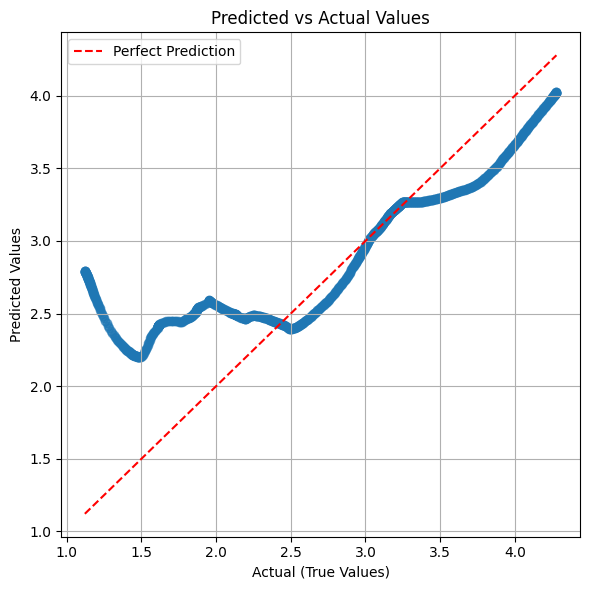

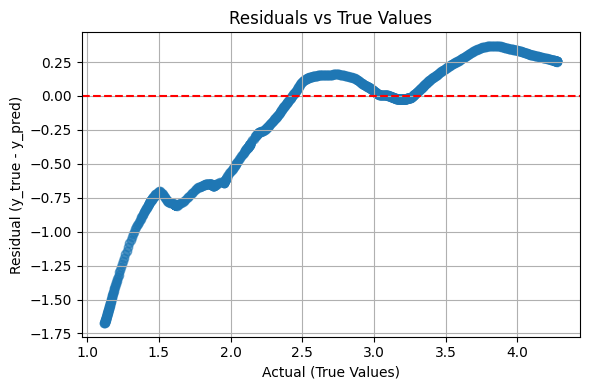

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers


# ----------------------------
# 1️ Reproducibility
# ----------------------------
def set_global_seed(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    print(f"Global random seed set to {seed}")


# ----------------------------
# 2️ Model Definition (Smaller + Deeper + BatchNorm)
# ----------------------------
def build_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(256, kernel_regularizer=regularizers.l2(1e-5), input_shape=(input_dim,)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.1),

        Dense(128, kernel_regularizer=regularizers.l2(1e-5)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.1),

        Dense(64, kernel_regularizer=regularizers.l2(1e-5)),
        BatchNormalization(),
        Activation('relu'),

        Dense(32, kernel_regularizer=regularizers.l2(1e-5)),
        BatchNormalization(),
        Activation('relu'),

        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mae',          # better aligned with your target metric
        metrics=['mape']
    )
    return model


# ----------------------------
# 3️ Training Function
# ----------------------------
def train_nn_regressor(train_csv, test_csv=None, target_column="target",
                       use_split=False, seed=42):
    set_global_seed(seed)

    # --- Load data ---
    df_train = pd.read_csv(train_csv)
    if test_csv:
        df_test = pd.read_csv(test_csv)
    elif use_split:
        df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=seed)
    else:
        raise ValueError("Either provide a test CSV or set use_split=True.")

    # --- Fill NaNs ---
    df_train = df_train.fillna(df_train.mean(numeric_only=True))
    df_test = df_test.fillna(df_test.mean(numeric_only=True))

    # --- Split X and y ---
    X_train = df_train.drop(columns=[target_column]).values
    y_train = df_train[target_column].values.reshape(-1, 1)
    X_test = df_test.drop(columns=[target_column]).values
    y_test = df_test[target_column].values.reshape(-1, 1)

    # --- Scale features using RobustScaler (handles outliers better) ---
    scaler_X = RobustScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    # --- Scale target (-1, 1) ---
    scaler_y = MinMaxScaler(feature_range=(-1, 1))
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    # --- Build model ---
    model = build_model(X_train.shape[1], learning_rate=0.001)

    # --- Callbacks (optimization improvements) ---
    early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6, verbose=1)

    # --- Train ---
    history = model.fit(
        X_train, y_train_scaled,
        validation_data=(X_test, y_test_scaled),
        epochs=500,
        batch_size=64,
        verbose=1,
        callbacks=[early_stop, reduce_lr]
    )

    # --- Predict & inverse-transform ---
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_original = scaler_y.inverse_transform(y_test_scaled)

    # --- Metrics ---
    mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
    mae = mean_absolute_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)

    print(f"\n Final Test MAPE: {mape:.3f}%")
    print(f" Mean Absolute Error (MAE): {mae:.5f}")
    print(f" R² Score: {r2:.4f}")

    # --- Visualization ---
    plot_results(y_test_original, y_pred)

    return model, history, (mape, mae, r2), (y_test_original, y_pred)


# ----------------------------
# 4️ Visualization
# ----------------------------
def plot_results(y_true, y_pred):
    # --- Predicted vs Actual ---
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    min_val, max_val = min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    plt.title("Predicted vs Actual Values")
    plt.xlabel("Actual (True Values)")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Residual Plot ---
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title("Residuals vs True Values")
    plt.xlabel("Actual (True Values)")
    plt.ylabel("Residual (y_true - y_pred)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# ----------------------------
# 5️ Example Usage
# ----------------------------
model, history, metrics, (y_true, y_pred) = train_nn_regressor(
    train_csv="output_quartz(ruby)_kripke.exe.csv",
    test_csv="/g/g90/dhakal1/All/MIN_example/generated_cycles(kripke)/generated_cycle_1.csv",
    target_column="relative_runtime",
    seed=42
)